In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import collections

%matplotlib inline


Students:
* Emilio Tylson Baixauli
* Alfons Córdoba Meneses

# Network dataset

We have decided to work with MovieLens dataset of 100k entries. This dataset contains 100k user ratings of movies.
Following we explore the datset in order to model it as a graph/network.
The main idea is to model the dataset as bipartite network where there is one class represented by user and a class of movies. The edges represent that a user rated a movie. On possibility is that the network could be weighted by the user's rating but in this first iteration we decided to model the network without weights. 

The dataset is partitioned into u.user, u.item and u.data. Hence, the following code joinst the data together in an unique DataFrame object.

In [2]:
source = 'u.data'

def print_lines(source, lines_p=2):
    with open(source) as file:
        lines=0
        for line in file.readlines():
            lines+=1
            if lines<lines_p:
                print(line)
    print('number of lines:',lines)
    return

#print_lines(source)
#print_lines('u.item')
#print_lines('u.user')
#print_lines('u.info')

In [3]:
df_users = pd.read_csv('u.user',sep='|', header=None, names=['user_id','age','gender','occupation','zip_code'])
df_users.head()

user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

In [4]:
df_movies = pd.read_csv('u.item',sep='|',encoding='latin-1',header=None, names=['movie_id','movie_title','release_date','video_release_date','IMDb URL','unknown','action','adventure','animation','children\'s','comedy','crime','documentary','drama','fantasy','film-noir','horror','musical','mystery','romance','sci-fi','thriller','war','western'])
df_movies.head()

movie_id        movie_title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb URL  unknown  action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   adventure  animation  children's  ...  fantasy  film-noir  horror  musical  \
0          0          1           1  ...        0          0       0        0   
1          1          0           0  ...        0          0       0        0   
2          0          0           0  ...        0          0       0        0   
3          0          0           0  ...        0          0       0        0   
4          0          0           0  ...        0          0       0        0   

   mystery  romance  sci-fi  thriller  war  western  
0        0        0       0         0    0        0  
1        0        0       0         1    0        0  
2        0        0       0         1    0        0  
3        0        0       0         0    0        0  
4        0        0       0         1    0        0  

[5 rows x 24 columns]

In [5]:
df_data = pd.read_csv('u.data',sep='\t',header=None,names=['user_id','movie_id','rating','timestamp'])
df_data.head()

user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Final DataFrame dataset

In [6]:
df_total = pd.merge(df_data, df_movies)
df_total = pd.merge(df_total, df_users)
df_total.head()

user_id  movie_id  rating  timestamp  \
0      196       242       3  881250949   
1      196       257       2  881251577   
2      196       111       4  881251793   
3      196        25       4  881251955   
4      196       382       4  881251843   

                                         movie_title release_date  \
0                                       Kolya (1996)  24-Jan-1997   
1                                Men in Black (1997)  04-Jul-1997   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996   
3                               Birdcage, The (1996)  08-Mar-1996   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994   

   video_release_date                                           IMDb URL  \
0                 NaN    http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Men+in+Black+...   
2                 NaN  http://us.imdb.com/M/title-exact?Truth%20About...   
3                 NaN  http://us.imdb.com/M/title-exact?Birdcage,%20T...   
4                 NaN  http://us.imdb.com/M/title-exact?Adventures%20...   

   unknown  action  ...  mystery  romance  sci-fi  thriller  war  western  \
0        0       0  ...        0        0       0         0    0        0   
1        0       1  ...        0        0       1         0    0        0   
2        0       0  ...        0        1       0         0    0        0   
3        0       0  ...        0        0       0         0    0        0   
4        0       0  ...        0        0       0         0    0        0   

   age  gender  occupation  zip_code  
0   49       M      writer     55105  
1   49       M      writer     55105  
2   49       M      writer     55105  
3   49       M      writer     55105  
4   49       M      writer     55105  

[5 rows x 31 columns]

Compute list of edges user-movie

In [7]:
# List of edges betwee user that rated a movie
j=0
edges_list=[]
for i in range(df_total.shape[0]):
    edges_list.append([df_total.user_id.iloc[i], df_total.movie_title.iloc[i]])



In [8]:
list_movies = np.unique(df_total.movie_title)
list_users = np.unique(df_total.user_id)
print(min(list_movies),max(list_movies))
print(min(list_users),max(list_users))

'Til There Was You (1997) Á köldum klaka (Cold Fever) (1994)
1 943


Following we define the bipartite graph of user-movies. As mentioned before movies are one class and movies are the other class. Having defined the network as follow we can see the relation between movies or the relation between users.

In [9]:
g = nx.Graph()
g.add_nodes_from(list_movies, bipartite=0)
g.add_nodes_from(list_users, bipartite=1)
g.add_edges_from(edges_list)
users_nodes, movies_nodes = bipartite.sets(g)

We also use the projection on the movies nodes.

In [10]:
movie_projection_graph = bipartite.projected_graph(g, users_nodes)
users_projection_graph = bipartite.projected_graph(g, movies_nodes)

In [12]:
from networkx.algorithms import bipartite

print('The graph is connected:',nx.is_connected(g))
print('The graph is bipartite:',nx.is_bipartite(g))

The graph is connected: True
The graph is bipartite: True


In [13]:
g.edges

EdgeView([("'Til There Was You (1997)", 532), ("'Til There Was You (1997)", 416), ("'Til There Was You (1997)", 178), ("'Til There Was You (1997)", 299), ("'Til There Was You (1997)", 782), ("'Til There Was You (1997)", 152), ("'Til There Was You (1997)", 342), ("'Til There Was You (1997)", 223), ("'Til There Was You (1997)", 530), ('1-900 (1994)', 181), ('1-900 (1994)', 405), ('1-900 (1994)', 833), ('1-900 (1994)', 385), ('1-900 (1994)', 581), ('101 Dalmatians (1996)', 63), ('101 Dalmatians (1996)', 1), ('101 Dalmatians (1996)', 463), ('101 Dalmatians (1996)', 497), ('101 Dalmatians (1996)', 416), ('101 Dalmatians (1996)', 597), ('101 Dalmatians (1996)', 181), ('101 Dalmatians (1996)', 697), ('101 Dalmatians (1996)', 937), ('101 Dalmatians (1996)', 13), ('101 Dalmatians (1996)', 186), ('101 Dalmatians (1996)', 49), ('101 Dalmatians (1996)', 62), ('101 Dalmatians (1996)', 334), ('101 Dalmatians (1996)', 276), ('101 Dalmatians (1996)', 378), ('101 Dalmatians (1996)', 222), ('101 Dalmati

In [14]:
g.nodes

NodeView(("'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (1994)', 'Air

# Matrices Representation

The basic network representation is the adjacency matrix. In this particular network is it is an undirected network the adjacency matrix is symetric

In [15]:
adjacency = nx.adjacency_matrix(movie_projection_graph)

In [16]:
np_adjacency = adjacency.toarray()
np_adjacency

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 1, 0]], dtype=int32)

In [17]:
import numpy
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return numpy.allclose(a, a.T, rtol=rtol, atol=atol)

In [18]:
check_symmetric(np_adjacency)

True

Other representation is the Lapacian matrix L = D - A, where A is the adjacency matrix and D is the diagonal matrix of node degrees.

In [19]:
laplacian = nx.laplacian_matrix(movie_projection_graph)

In [20]:
laplacian.toarray()

array([[ 432,    0,    0, ...,    0,   -1,    0],
       [   0, 1153,   -1, ...,   -1,    0,   -1],
       [   0,   -1, 1185, ...,   -1,    0,   -1],
       ...,
       [   0,   -1,   -1, ..., 1183,   -1,   -1],
       [  -1,    0,    0, ...,   -1, 1340,   -1],
       [   0,   -1,   -1, ...,   -1,   -1, 1071]], dtype=int32)

# Local characterization

Following we compute local metrics of the graph. This metrics explains the network in a Microscale level, meaning that analyse the role of noodes in the network such as centrality, degree, betweenes, etc.

We can observe that the biparite graph has no cycles in the representation. But the movies proection has more relationships and paths.

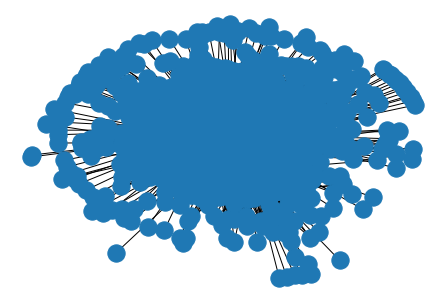

In [21]:
nx.draw(g)

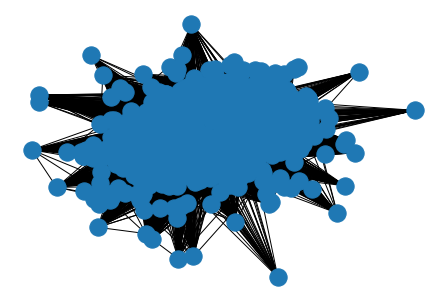

In [22]:
nx.draw(movie_projection_graph)

#### Degree Centrality
Number of links that a node has that allows to measure how important is a node with respect to its nearest neighbors. In other words the degree centrality for a node v is the fraction of nodes it is connected to.

In [189]:
centrality = nx.degree_centrality(g)
centrality

{"'Til There Was You (1997)": 0.0034535686876438986,
 '1-900 (1994)': 0.001918649270913277,
 '101 Dalmatians (1996)': 0.041826554105909436,
 '12 Angry Men (1957)': 0.04796623177283193,
 '187 (1997)': 0.015732924021488872,
 '2 Days in the Valley (1996)': 0.03568687643898695,
 '20,000 Leagues Under the Sea (1954)': 0.02762854950115119,
 '2001: A Space Odyssey (1968)': 0.09938603223330775,
 '3 Ninjas: High Noon At Mega Mountain (1998)': 0.001918649270913277,
 '39 Steps, The (1935)': 0.02264006139677667,
 '8 1/2 (1963)': 0.014581734458940905,
 '8 Heads in a Duffel Bag (1997)': 0.0015349194167306216,
 '8 Seconds (1994)': 0.0015349194167306216,
 'A Chef in Love (1996)': 0.0030698388334612432,
 'Above the Rim (1994)': 0.001918649270913277,
 'Absolute Power (1997)': 0.04873369148119724,
 'Abyss, The (1989)': 0.057943207981580966,
 'Ace Ventura: Pet Detective (1994)': 0.03952417498081351,
 'Ace Ventura: When Nature Calls (1995)': 0.01419800460475825,
 'Across the Sea of Time (1995)': 0.00153491

In [191]:
import operator

max_centrality = max(centrality.items(), key=operator.itemgetter(1))[0]

print('The item with a higher degree of centrality is user:', max_centrality)

The item with a higher degree of centrality is user: 405


In the movies projection we can observe more degree centrality because nodes have much more conections.

In [197]:
movies_centrality = nx.degree_centrality(movie_projection_graph)
movies_centrality

{'Good Morning (1971)': 0.2597714972940469,
 'Mighty Morphin Power Rangers: The Movie (1995)': 0.693325315694528,
 'Robocop 3 (1993)': 0.7125676488274204,
 'Carried Away (1996)': 0.7215874924834637,
 'Prefontaine (1997)': 0.3728202044497896,
 'Sword in the Stone, The (1963)': 0.8628983764281419,
 'Koyaanisqatsi (1983)': 0.7997594708358389,
 'Cronos (1992)': 0.5628382441371016,
 'August (1996)': 0.2597714972940469,
 'Collectionneuse, La (1967)': 0.6530366806975346,
 'Amityville Curse, The (1990)': 0.634996993385448,
 'Larger Than Life (1996)': 0.666867107636801,
 'Hunt for Red October, The (1990)': 0.9416716776909201,
 'Santa Clause, The (1994)': 0.8334335538184006,
 'Looking for Richard (1996)': 0.8556825015033073,
 'Milk Money (1994)': 0.8190018039687312,
 'Delta of Venus (1994)': 0.4539987973541792,
 'Chasers (1994)': 0.4672279013830427,
 "Sophie's Choice (1982)": 0.8123872519542995,
 'My Crazy Life (Mi vida loca) (1993)': 0.7793144918821407,
 'Clueless (1995)': 0.9428743235117258,
 

In [196]:
import operator

max_centrality_movie = max(movies_centrality.items(), key=operator.itemgetter(1))[0]

print('The movie with a higher degree of centrality is:', max_centrality_movie)

The movie with a higher degree of centrality is: Scream (1996)


In the user projection we can observe more degree centrality because nodes have much more conections.

In [199]:
user_centrality = nx.degree_centrality(users_projection_graph)
user_centrality

{1: 1.0,
 2: 0.9968152866242038,
 3: 0.975583864118896,
 4: 0.9734607218683652,
 5: 0.9140127388535032,
 6: 1.0,
 7: 1.0,
 8: 0.9883227176220807,
 9: 0.9734607218683652,
 10: 1.0,
 11: 1.0,
 12: 0.9777070063694268,
 13: 1.0,
 14: 0.9978768577494692,
 15: 0.9978768577494692,
 16: 1.0,
 17: 0.9830148619957537,
 18: 0.9819532908704883,
 19: 0.9628450106157113,
 20: 0.9628450106157113,
 21: 0.994692144373673,
 22: 0.9861995753715499,
 23: 0.9957537154989384,
 24: 0.9989384288747346,
 25: 0.9787685774946921,
 26: 0.9989384288747346,
 27: 0.9787685774946921,
 28: 0.9978768577494692,
 29: 0.9787685774946921,
 30: 0.9936305732484076,
 31: 0.9193205944798302,
 32: 0.9883227176220807,
 33: 0.9150743099787686,
 34: 0.8959660297239915,
 35: 0.8471337579617835,
 36: 0.8556263269639066,
 37: 0.940552016985138,
 38: 0.9936305732484076,
 39: 0.9288747346072187,
 40: 0.9416135881104034,
 41: 0.9893842887473461,
 42: 0.940552016985138,
 43: 1.0,
 44: 0.9989384288747346,
 45: 0.9426751592356688,
 46: 0.9

In [201]:
import operator

max_centrality_user = max(user_centrality.items(), key=operator.itemgetter(1))[0]

print('The user with a higher degree of centrality is:', max_centrality_user)

The user with a higher degree of centrality is: 1


#### Clustering

It is the amount of triangles over the total amount of possible traingles that can be formed from node. 

In [28]:
clustering = nx.clustering(g)
clustering

{"'Til There Was You (1997)": 0,
 '1-900 (1994)': 0,
 '101 Dalmatians (1996)': 0,
 '12 Angry Men (1957)': 0,
 '187 (1997)': 0,
 '2 Days in the Valley (1996)': 0,
 '20,000 Leagues Under the Sea (1954)': 0,
 '2001: A Space Odyssey (1968)': 0,
 '3 Ninjas: High Noon At Mega Mountain (1998)': 0,
 '39 Steps, The (1935)': 0,
 '8 1/2 (1963)': 0,
 '8 Heads in a Duffel Bag (1997)': 0,
 '8 Seconds (1994)': 0,
 'A Chef in Love (1996)': 0,
 'Above the Rim (1994)': 0,
 'Absolute Power (1997)': 0,
 'Abyss, The (1989)': 0,
 'Ace Ventura: Pet Detective (1994)': 0,
 'Ace Ventura: When Nature Calls (1995)': 0,
 'Across the Sea of Time (1995)': 0,
 'Addams Family Values (1993)': 0,
 'Addicted to Love (1997)': 0,
 'Addiction, The (1995)': 0,
 'Adventures of Pinocchio, The (1996)': 0,
 'Adventures of Priscilla, Queen of the Desert, The (1994)': 0,
 'Adventures of Robin Hood, The (1938)': 0,
 'Affair to Remember, An (1957)': 0,
 'African Queen, The (1951)': 0,
 'Afterglow (1997)': 0,
 'Age of Innocence, The 

In [29]:
for k, v in clustering.items():
    if v > 0:
        print(clustering[k])

In this case, when clustering is applyed to the movie projection, the metric gives an idea if the related movies of a node are related together.

In [30]:
movie_clustering = nx.clustering(movie_projection_graph)
movie_clustering

{'Good Morning (1971)': 1.0,
 'Mighty Morphin Power Rangers: The Movie (1995)': 0.9027476631010889,
 'Robocop 3 (1993)': 0.8888670315885506,
 'Carried Away (1996)': 0.862471504031137,
 'Prefontaine (1997)': 0.9847725259263119,
 'Sword in the Stone, The (1963)': 0.824990888283061,
 'Koyaanisqatsi (1983)': 0.8566416040100251,
 'Cronos (1992)': 0.9485099867452809,
 'August (1996)': 1.0,
 'Collectionneuse, La (1967)': 0.89995671767192,
 'Amityville Curse, The (1990)': 0.9254236679592129,
 'Larger Than Life (1996)': 0.8808924682528573,
 'Hunt for Red October, The (1990)': 0.7634868756605013,
 'Santa Clause, The (1994)': 0.839253806762832,
 'Looking for Richard (1996)': 0.8125550406077373,
 'Milk Money (1994)': 0.8555836437965088,
 'Delta of Venus (1994)': 0.9869657631703761,
 'Chasers (1994)': 0.9610748450954637,
 "Sophie's Choice (1982)": 0.8370644515722236,
 'My Crazy Life (Mi vida loca) (1993)': 0.8631452881452881,
 'Clueless (1995)': 0.7624750921427921,
 'Amityville 3-D (1983)': 0.90905

In [185]:
import operator

max_cluster_movie = max(movie_clustering.items(), key=operator.itemgetter(1))[0]

print('The movie with a higher degree of clustering is:', max_cluster_movie)

The movie with a higher degree of clustering is: Good Morning (1971)


#### Page Rank

Computes a ranking of the nodes in the graph G based on the structure of the incoming links. 

In [31]:
d = nx.pagerank(movie_projection_graph)
sorted(d.items(), key=lambda x: x[1])[:10]

{'Good Morning (1971)': 0.0002822493869774477,
 'Mighty Morphin Power Rangers: The Movie (1995)': 0.0005894659129677798,
 'Robocop 3 (1993)': 0.0006042387359170581,
 'Carried Away (1996)': 0.000614821879589603,
 'Prefontaine (1997)': 0.00035649114670346563,
 'Sword in the Stone, The (1963)': 0.0007173248289022767,
 'Koyaanisqatsi (1983)': 0.0006693072016202932,
 'Cronos (1992)': 0.0004935820879279575,
 'August (1996)': 0.00028224938697744774,
 'Collectionneuse, La (1967)': 0.0005607951166436791,
 'Amityville Curse, The (1990)': 0.0005464961548503716,
 'Larger Than Life (1996)': 0.0005745550281482302,
 'Hunt for Red October, The (1990)': 0.0007831915090623298,
 'Santa Clause, The (1994)': 0.0006949265257954268,
 'Looking for Richard (1996)': 0.0007152077766535076,
 'Milk Money (1994)': 0.0006825683774178026,
 'Delta of Venus (1994)': 0.00041807758388334466,
 'Chasers (1994)': 0.0004250648529100381,
 "Sophie's Choice (1982)": 0.0006815538320154135,
 'My Crazy Life (Mi vida loca) (1993)':

#### Betweenness centrality

Measures the intermediary node in the network. The centrality of the node is related to the amount of paths that the node is included. More the flow of a node has, more central.


In [32]:
d = nx.betweenness_centrality(movie_projection_graph)
sorted(d.items(), key=lambda x: x[1])[:10]

{'Good Morning (1971)': 0.0,
 'Mighty Morphin Power Rangers: The Movie (1995)': 6.861679841968105e-05,
 'Robocop 3 (1993)': 8.667578058941517e-05,
 'Carried Away (1996)': 0.00012835401083951135,
 'Prefontaine (1997)': 2.737016660735567e-06,
 'Sword in the Stone, The (1963)': 0.00021725659981200368,
 'Koyaanisqatsi (1983)': 0.00015119833404045525,
 'Cronos (1992)': 2.3509309903113193e-05,
 'August (1996)': 0.0,
 'Collectionneuse, La (1967)': 6.233251937170057e-05,
 'Amityville Curse, The (1990)': 4.060563621837555e-05,
 'Larger Than Life (1996)': 9.982924280734392e-05,
 'Hunt for Red October, The (1990)': 0.0004252787492690564,
 'Santa Clause, The (1994)': 0.00018442320264602918,
 'Looking for Richard (1996)': 0.0002594817722709528,
 'Milk Money (1994)': 0.0001475043707854687,
 'Delta of Venus (1994)': 1.8931468671278912e-05,
 'Chasers (1994)': 1.3667646594920797e-05,
 "Sophie's Choice (1982)": 0.00019281544569434774,
 'My Crazy Life (Mi vida loca) (1993)': 0.00012510160727489435,
 'Clu

#### Closeness centrality

Average distance for each node to the others.


In [33]:
d = nx.closeness_centrality(movie_projection_graph)
sorted(d.items(), key=lambda x: x[1])[:10]

{'Good Morning (1971)': 0.5746371803731859,
 'Mighty Morphin Power Rangers: The Movie (1995)': 0.7653014265991717,
 'Robocop 3 (1993)': 0.7767398411957029,
 'Carried Away (1996)': 0.7822201317027281,
 'Prefontaine (1997)': 0.614560236511456,
 'Sword in the Stone, The (1963)': 0.8794288736118456,
 'Koyaanisqatsi (1983)': 0.8331663326653307,
 'Cronos (1992)': 0.69581589958159,
 'August (1996)': 0.5746371803731859,
 'Collectionneuse, La (1967)': 0.7424107142857143,
 'Amityville Curse, The (1990)': 0.7325991189427313,
 'Larger Than Life (1996)': 0.7501127649977447,
 'Hunt for Red October, The (1990)': 0.9448863636363637,
 'Santa Clause, The (1994)': 0.8572164948453608,
 'Looking for Richard (1996)': 0.8738833420914346,
 'Milk Money (1994)': 0.8467413441955194,
 'Delta of Venus (1994)': 0.64683002722676,
 'Chasers (1994)': 0.6524127108670067,
 "Sophie's Choice (1982)": 0.8420253164556962,
 'My Crazy Life (Mi vida loca) (1993)': 0.8192118226600985,
 'Clueless (1995)': 0.9459613196814562,
 'A

# Macrosacale metrics

In this section we compute some macroscale metrics of the user/movie graph projection

### Distance measures
Summarize path's length between nodes. Eccentricity is the maximum distance from a node to all other nodes in G.
For example, follwing we compute the exentricity of a well known movie like Citizen Kane is 2. That means that we can find a user in comon that has seen Citizen Kane and any other movie

In [34]:
nx.eccentricity(movie_projection_graph,'Citizen Kane (1941)')

2

Diameter computes the maximum eccentricity of the graph. This number is the maximum distance between any two nodes of the graph, hence the computation is extremely heavy.

In [35]:
nx.diameter(movie_projection_graph)

2

Center retrives the movies that have the excentricy equal to the radius. Those movies are the ones that have at least one user in comon to any other movie. 

In [36]:
nx.center(movie_projection_graph)[:10]

['Good Morning (1971)',
 'Mighty Morphin Power Rangers: The Movie (1995)',
 'Robocop 3 (1993)',
 'Carried Away (1996)',
 'Prefontaine (1997)',
 'Sword in the Stone, The (1963)',
 'Koyaanisqatsi (1983)',
 'Cronos (1992)',
 'August (1996)',
 'Collectionneuse, La (1967)',
 'Amityville Curse, The (1990)',
 'Larger Than Life (1996)',
 'Hunt for Red October, The (1990)',
 'Santa Clause, The (1994)',
 'Looking for Richard (1996)',
 'Milk Money (1994)',
 'Delta of Venus (1994)',
 'Chasers (1994)',
 "Sophie's Choice (1982)",
 'My Crazy Life (Mi vida loca) (1993)',
 'Clueless (1995)',
 'Amityville 3-D (1983)',
 'Cement Garden, The (1993)',
 'Mad City (1997)',
 'Duck Soup (1933)',
 'Full Metal Jacket (1987)',
 'Surviving the Game (1994)',
 'Shadow, The (1994)',
 'Amos & Andrew (1993)',
 'Lost Highway (1997)',
 'Palookaville (1996)',
 'Spellbound (1945)',
 'Magnificent Seven, The (1954)',
 'Leopard Son, The (1996)',
 'Roman Holiday (1953)',
 'Raise the Red Lantern (1991)',
 'Nutty Professor, The (

Same happens if we anlyse the user projection. If we compute the excentricity of user 10, we see that he has at least one movie in common to any other movie.

In [37]:
nx.eccentricity(users_projection_graph,10)

1

In [38]:
nx.eccentricity(users_projection_graph,88)

2

In [39]:
nx.diameter(users_projection_graph)

2

### Clustering
Number of triangles over the posible tirange (triads, the number of two edges that a node is part). It gisves an idea of circle of movies that have users in common (alternatively for users). Following the average of clustering for each graph.

In [40]:
nx.average_clustering(movie_projection_graph)

0.8670446853322655

In [41]:
nx.average_clustering(users_projection_graph)

0.9718148456405401

### Degree distribution
Following we compute the histogram of number of links per node. Indocator of the probability that a randomly selected node has k links (P(k)). 
Following the histogram of links per node of the movie projection graph. Despite there is an uniform distirbution of links, most of the density is situated between 1000 and 1600 links. Movies that are more popular have more links.

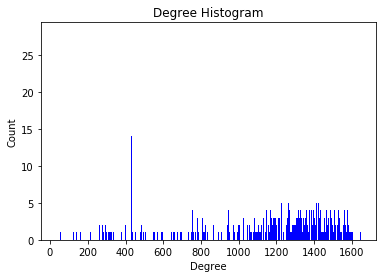

In [65]:
degree_sequence = sorted([d for n, d in movie_projection_graph.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, width=1, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

plt.show()

On the other hand is the user histogram.

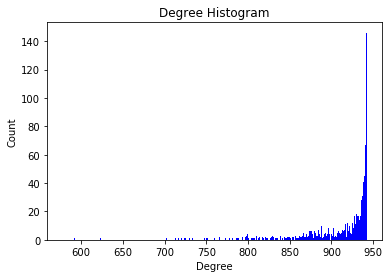

In [73]:
degree_sequence = sorted([d for n, d in users_projection_graph.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
# fig, ax = plt.subplots()

plt.bar(deg, cnt, width=1, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

plt.show()

### Assortativity

 Assortativity tells us if nodes connected to each other are similar. We have calculated the assortativity coefficient for the whole graph and its 2 projections. We expected a negative assortativity coefficient (disassortative network) for the whole graph since it is bipartite and each node is only connected to nodes belonging to the other graph. The projection of the network corresponding to users has a close to 0 assortativity coefficient and pearson coefficient which may indicate randomness. And lastly, the projection of the network corresponding to movies shows quite a low pearson and assortativity coefficients but not as low as the beforementioned graph.

In [60]:
assor_coeff_users = nx.degree_assortativity_coefficient(users_projection_graph)
pearson_coeff_users = nx.degree_pearson_correlation_coefficient(users_projection_graph)
print('User projection')
print('Assortativity coefficient:', assor_coeff_users,'Pearson coefficient:', pearson_coeff_users)

User projection
Assortativity coefficient: -0.055225636567298834 Pearson coefficient: -0.05522563656725163


In [59]:
assor_coeff_movie = nx.degree_assortativity_coefficient(movie_projection_graph)
pearson_coeff_movie = nx.degree_pearson_correlation_coefficient(movie_projection_graph)
print('Movies projection')
print('Assortativity coefficient:', assor_coeff_movie,'Pearson coefficient:', pearson_coeff_movie)

Movies projection
Assortativity coefficient: -0.1383336019620416 Pearson coefficient: -0.1383336019619873


In [62]:
assor_coeff = nx.degree_assortativity_coefficient(g)
pearson_coeff = nx.degree_pearson_correlation_coefficient(g)
print('Full graph')
print('Assortativity coefficient:', assor_coeff,'Pearson coefficient:', pearson_coeff)

Full graph
Assortativity coefficient: -0.227009766405234 Pearson coefficient: -0.227009766405239


In [181]:

# function that plots the degree distribution of the network
def plot_deg_hist(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    plt.bar(deg, cnt, width=1, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    # ax.set_xticks([d + 0.4 for d in deg])
    # ax.set_xticklabels(deg)

    plt.show()
def print_degree_mean(graph):
    degree_mean = np.array([d for n, d in graph.degree()]).mean()
    print("Degree mean {}".format(degree_mean))
    
def print_assor(graph):
    assor_coeff = nx.degree_assortativity_coefficient(graph)
    pearson_coeff = nx.degree_pearson_correlation_coefficient(graph)
    print('Assortativity coefficient:', assor_coeff,'\nPearson coefficient:', pearson_coeff)
    
def print_clust(graph):
    string = 'The average clustering is {}'
    print(string.format(nx.average_clustering(graph)))
    
def print_diameter(graph):
    string = 'The diameter is {}'
    print(string.format(nx.diameter(graph)))

### Random graphs

Let us review briefly some of the features and magnitudes that describe our network (or pair of networks) from the DataLens dataset.

In [12]:
n_nodes_movies = len(movie_projection_graph.nodes())
n_edges_movies = len(movie_projection_graph.edges())


n_nodes_users = len(users_projection_graph.nodes())
n_edges_users = len(users_projection_graph.edges())

n_nodes = len(g.nodes())
n_edges = len(g.edges())

print('Some figures about the bipartite dataset:')
figures_string = 'The {} projection has {} nodes and {} edges.'
print(figures_string.format('movie', n_nodes_movies, n_edges_movies))
print(figures_string.format('user' ,n_nodes_users, n_edges_users))
print(figures_string.format('full' ,n_nodes, n_edges))



Some figures about the bipartite dataset:
The movie projection has 1664 nodes and 969440 edges.
The user projection has 943 nodes and 429193 edges.
The full projection has 2607 nodes and 99693 edges.


Clearly the full graph constit on the sum of projections nodes but contains less edges as it only representsrelation user movies.


Full graph degree distribution
Assortativity coefficient: -0.227009766405234 
Pearson coefficient: -0.22700976640523904


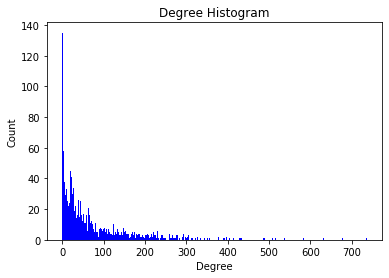

The average clustering is 0.0


In [21]:
print('\nFull graph degree distribution')
print_assor(g)
plot_deg_hist(g)
print_clust(g)


Movie projection degree distribution
Assortativity coefficient: -0.1383336019620416 
Pearson coefficient: -0.13833360196198727


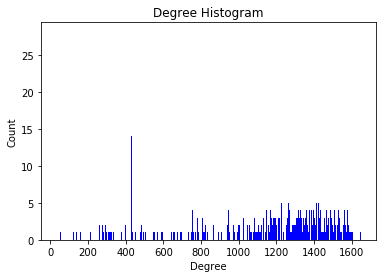

The average clustering is 0.8670446853322663


In [22]:
print('\nMovie projection degree distribution')
print_assor(movie_projection_graph)
plot_deg_hist(movie_projection_graph)
print_clust(movie_projection_graph)

In [33]:
print_degree_mean(movie_projection_graph)

Degree mean 1165.1923076923076



Users projection degree distribution
Assortativity coefficient: -0.055225636567298834 
Pearson coefficient: -0.05522563656725163


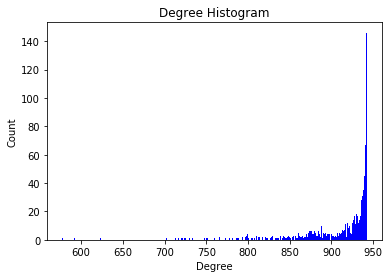

The average clustering is 0.9718148456405401


In [23]:
print('\nUsers projection degree distribution')
print_assor(users_projection_graph)
plot_deg_hist(users_projection_graph)
print_clust(users_projection_graph)

In [34]:
print_degree_mean(users_projection_graph)

Degree mean 910.271474019088


#### Erdos-Renyi Graph
The NetworkX implementations offers a function for Erdos-Renyi that accept as parameters the number of nodes and the edge probability. This deffinition is more similar to the Binomial Random Graph. We test with two random graphs taht contains the number of nodes of each projection. We observe that the degree distribution has a a normal shape, different from the histogram of the projections. Also we notice that all random grphs have assortativity and Pearson near 0. One intersting thing is that the random graph with 0.9 of edge probability have a similar clustering factor despite not having similar assortativity.

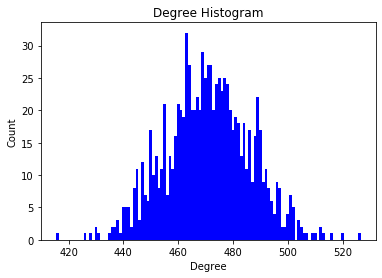

Assortativity coefficient: -0.002770029040942595 
Pearson coefficient: -0.0027700290413468108
The average clustering is 0.49995372056419984


In [24]:
er_graph = nx.erdos_renyi_graph(n_nodes_users, 0.5)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

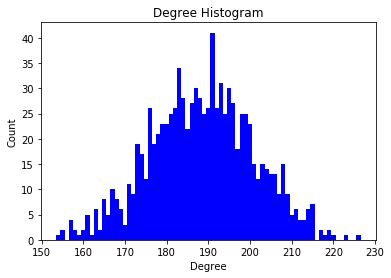

Assortativity coefficient: -0.0057621287814757045 
Pearson coefficient: -0.005762128781423849
The average clustering is 0.20014464479333777


In [28]:
er_graph = nx.erdos_renyi_graph(n_nodes_users, 0.2)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

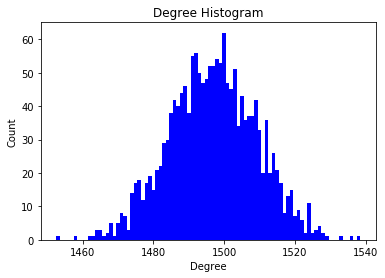

Assortativity coefficient: -0.0009579022463196715 
Pearson coefficient: -0.0009579022506886894
The average clustering is 0.9000849827342078


In [25]:
er_graph = nx.erdos_renyi_graph(n_nodes_movies, 0.9)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

Edge probability  0.5476188653437857


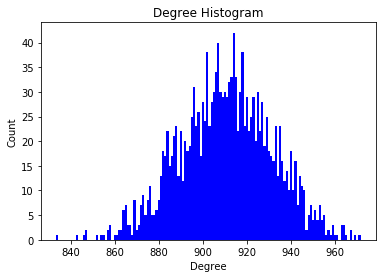

Assortativity coefficient: -0.0017762778516115477 
Pearson coefficient: -0.001776277851584143
The average clustering is 0.5476195055517139


In [30]:
p = n_edges_users/(n_nodes_movies*(n_nodes_users-1)/2)
print("Edge probability ", p)
er_graph = nx.erdos_renyi_graph(n_nodes_movies, p)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

We also try with probability equal to the proportion of edges with respect to the total posible edges, but we still observe the results far from being similar to the original networks.

Edge probability  0.700656829640594


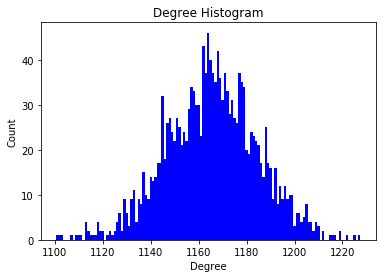

Assortativity coefficient: -0.0016518935009473203 
Pearson coefficient: -0.0016518935005219674
The average clustering is 0.7009425357376032


In [31]:
p = n_edges_movies/(n_nodes_movies*(n_nodes_movies-1)/2)
print("Edge probability ", p)
er_graph = nx.erdos_renyi_graph(n_nodes_movies, p)
plot_deg_hist(er_graph)
print_assor(er_graph)
print_clust(er_graph)

#### Watts-Strogatz graph
Following we compute several small world grpahs with the users nodes and movie words. The function uses as parameters the numbe rof ndes, the k nearest neghibours of the ring topology and the probability of rewiring. Paritcularly we use th user mean as k nearest neighbour and we vary the probability of rewiring. The histogram of the random graphs again is not similar to any of the projections, it has a bell shape. The cluster index , however, is the same we are using the average k nearest degree from the projection.

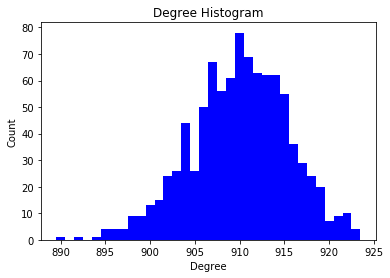

Assortativity coefficient: -0.0020550115619207385 
Pearson coefficient: -0.0020550115605516123
The average clustering is 0.96605664684433
Degree mean 910.0


In [35]:
ws_graph = nx.watts_strogatz_graph(n_nodes_users, 910, 0.2)
plot_deg_hist(ws_graph)
print_assor(ws_graph)
print_clust(ws_graph)
print_degree_mean(ws_graph)

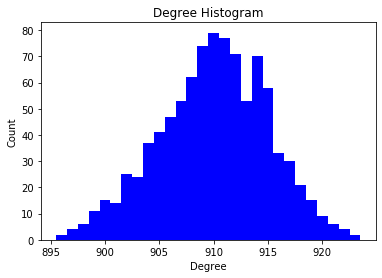

Assortativity coefficient: -0.002043620463406784 
Pearson coefficient: -0.002043620462695344
The average clustering is 0.9660577869939714
Degree mean 910.0


In [39]:
ws_graph = nx.watts_strogatz_graph(n_nodes_users, 910, 0.5)
plot_deg_hist(ws_graph)
print_assor(ws_graph)
print_clust(ws_graph)
print_degree_mean(ws_graph)

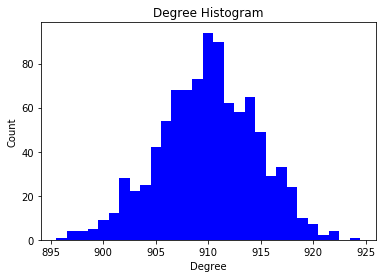

Assortativity coefficient: -0.0018856488756393468 
Pearson coefficient: -0.0018856488742813222
The average clustering is 0.9660491547548797
Degree mean 910.0


In [40]:
ws_graph = nx.watts_strogatz_graph(n_nodes_users, 910, 0.7)
plot_deg_hist(ws_graph)
print_assor(ws_graph)
print_clust(ws_graph)
print_degree_mean(ws_graph)

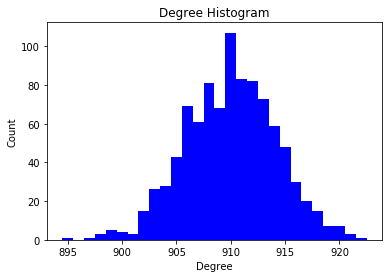

Assortativity coefficient: -0.0022362686524354017 
Pearson coefficient: -0.0022362686524486676
The average clustering is 0.9660387913574372
Degree mean 910.0


In [41]:
ws_graph = nx.watts_strogatz_graph(n_nodes_users, 910, 0.9)
plot_deg_hist(ws_graph)
print_assor(ws_graph)
print_clust(ws_graph)
print_degree_mean(ws_graph)

#### Barabasi Albert graph
The networkX function uses the nodes and an extra parameter that is the number of edges to attach from a new node to existing nodes. We test on many Barbasi random grphs 

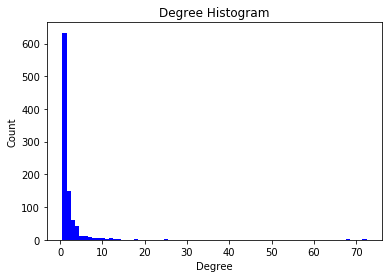

Assortativity coefficient: -0.11302786303567516 
Pearson coefficient: -0.1130278630356752
The average clustering is 0.0
Degree mean 1.997879109225875


In [42]:
ba_graph = nx.barabasi_albert_graph(n_nodes_users, 1)
plot_deg_hist(ba_graph)
print_assor(ba_graph)
print_clust(ba_graph)
print_degree_mean(ba_graph)

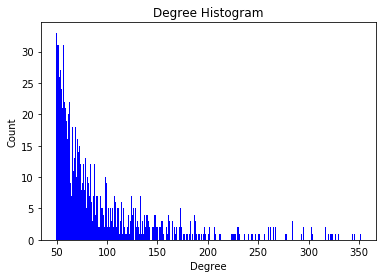

Assortativity coefficient: 0.00031848078922649573 
Pearson coefficient: 0.0003184807892238151
The average clustering is 0.1789105980726303
Degree mean 94.69777306468717


In [183]:
ba_graph = nx.barabasi_albert_graph(n_nodes_users, 50)
plot_deg_hist(ba_graph)
print_assor(ba_graph)
print_clust(ba_graph)
print_degree_mean(ba_graph)

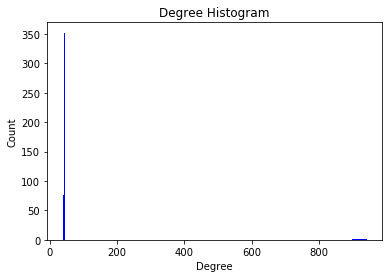

Assortativity coefficient: -0.9540425603346225 
Pearson coefficient: -0.9540425603346185
The average clustering is 0.9583753449509276
Degree mean 82.07847295864264


In [182]:
ba_graph = nx.barabasi_albert_graph(n_nodes_users, 900)
plot_deg_hist(ba_graph)
print_assor(ba_graph)
print_clust(ba_graph)
print_degree_mean(ba_graph)

# Communities
Following we use the module community (https://github.com/taynaud/python-louvain) that performs the louvain method,. First we will apply the community partiton algorithm to the user proection graph.

In [33]:
import networkx

In [24]:
%%time
partition = community.best_partition(users_projection_graph)

CPU times: user 7.64 s, sys: 141 ms, total: 7.78 s
Wall time: 8.16 s


In [23]:
print("Best parition founded by Louvian methdod is dividing the users into {} communities".format(len(set(partition.values()))))

Best parition founded by Louvian methdod is dividing the users into 2 communities


NetworkX has a set of funtion that measures the perfomance of partitions (https://networkx.github.io/documentation/stable/reference/algorithms/community.html).
Performance is the ratio of the number of intra-community edges plus inter-community non-edges with the total number of potential edges.

In [31]:
partition_dict = { p:[] for p in set(partition.values())}
for node, p in partition.items():
    partition_dict[p].append(node)
partition_list = [l for l in partition_dict.values()]

In [35]:
print("Louvian method performance", networkx.algorithms.community.performance(users_projection_graph, partition_list))

Louvian method performance 0.526167784524702


Following we alter the Louvian partition in order to corrroborate how the performance is affected

In [36]:
partition_list_mod = []
for c in partition_list:
    s = int(len(c)/2)
    partition_list_mod.append(c[:s])
    partition_list_mod.append(c[s:])
print("Performance of altered partition", networkx.algorithms.community.performance(users_projection_graph, partition_list_mod))

Performance of altered partition 0.2793789527482647


As we expected by analyzing the clustering method and eccentricity, the useres proection graph is highly dense, so the algorithm found that splitting the useres into two communities is the best partition so far

Now we will perform the same anlysis using the movie proection.

In [38]:
%%time
partition = community.best_partition(movie_projection_graph)

CPU times: user 36.8 s, sys: 456 ms, total: 37.3 s
Wall time: 40.6 s


In [39]:
print("Best parition founded by Louvian methdod is dividing the users into {} communities".format(len(set(partition.values()))))

Best parition founded by Louvian methdod is dividing the users into 3 communities


In [42]:
partition_dict = { p:[] for p in set(partition.values())}
for node, p in partition.items():
    partition_dict[p].append(node)
partition_list = [l for l in partition_dict.values()]
print("Louvian method performance", networkx.algorithms.community.performance(movie_projection_graph, partition_list))

Louvian method performance 0.5321281338174754


In [44]:
partition_list_mod = []
for c in partition_list:
    s = int(len(c)/2)
    partition_list_mod.append(c[:s])
    partition_list_mod.append(c[s:])
print("Performance of altered partition", networkx.algorithms.community.performance(movie_projection_graph, partition_list_mod))

Performance of altered partition 0.4156716892548222


In [46]:
partition_list[0][:10]

['Rebecca (1940)',
 'Right Stuff, The (1983)',
 'Nightmare on Elm Street, A (1984)',
 'M*A*S*H (1970)',
 'Wife, The (1995)',
 'Great Race, The (1965)',
 'Nemesis 2: Nebula (1995)',
 'Hamlet (1996)',
 'Sneakers (1992)',
 'Kika (1993)']

In [47]:
partition_list[1][:10]

['Disclosure (1994)',
 'Santa Clause, The (1994)',
 'Amityville: Dollhouse (1996)',
 'Ace Ventura: Pet Detective (1994)',
 'Sword in the Stone, The (1963)',
 'Red Firecracker, Green Firecracker (1994)',
 'Ref, The (1994)',
 'Farinelli: il castrato (1994)',
 'Forbidden Planet (1956)',
 'Sliver (1993)']

In [48]:
partition_list[2][:10]

['Feeling Minnesota (1996)',
 'Man of the Year (1995)',
 'Rhyme & Reason (1997)',
 'City Hall (1996)',
 'An Unforgettable Summer (1994)',
 'Beautiful Thing (1996)',
 'Celestial Clockwork (1994)',
 'Fear (1996)',
 'Assignment, The (1997)',
 'Johnny 100 Pesos (1993)']

In this case we see the Louvian method takes longer to compute the best paritition.